In [ ]:
import numpy as np
import tensorflow as tf

from modules.dataloader import DataLoader
from modules.embedding_extractor import EmbeddingExtractor

In [2]:
data_loader = DataLoader("raw-img")
dataset = data_loader.load_data()

Found 3363 files belonging to 5 classes.


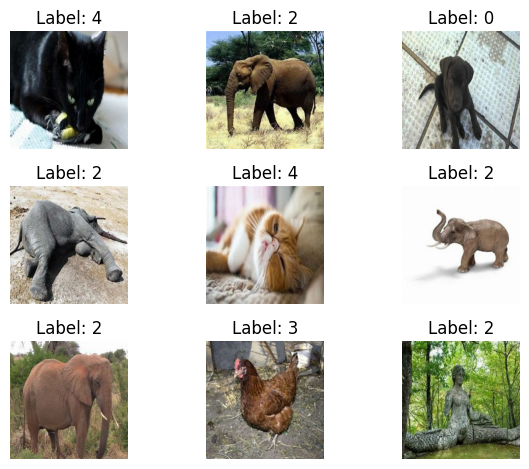

In [4]:
data_loader.plot_dataset()

In [ ]:
embeddings_list = []
labels_list = []

num_batches = tf.data.experimental.cardinality(dataset).numpy()

embedding_extractor = EmbeddingExtractor('resnet50')

i = 1

for batch, labels in dataset:

    print(f"Processing batch {i}/{num_batches}...")
    
    batch_embeddings = embedding_extractor.extract_embeddings(batch)

    embeddings_list.append(batch_embeddings)
    labels_list.append(labels.numpy())  # converte os labels para numpy
    i += 1


Processing batch 1/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 2/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 3/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 4/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 5/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 6/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 7/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 8/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 9/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 10/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 11/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 12/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 13/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 14/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 15/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 16/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
P

In [ ]:

# Concatenar tudo em um único array
# Embeddings: (num_amostras, embedding_dim)
embeddings_array = np.concatenate(embeddings_list, axis=0)

# Labels: (num_amostras,) ou (num_amostras, n_classes)
labels_array = np.concatenate(labels_list, axis=0)

In [57]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [145]:
X_train, X_test, y_train, y_test = train_test_split(embeddings_array, labels_array, test_size=0.3, stratify=labels_array, random_state=42)

In [146]:
colo = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
colors = [colo[label] for label in y_train]
colors

['orange',
 'green',
 'red',
 'orange',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'orange',
 'purple',
 'red',
 'red',
 'red',
 'purple',
 'red',
 'green',
 'red',
 'red',
 'red',
 'blue',
 'green',
 'green',
 'red',
 'blue',
 'blue',
 'purple',
 'blue',
 'green',
 'purple',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'orange',
 'green',
 'blue',
 'purple',
 'red',
 'green',
 'blue',
 'purple',
 'red',
 'green',
 'orange',
 'orange',
 'red',
 'purple',
 'blue',
 'red',
 'green',
 'orange',
 'green',
 'green',
 'green',
 'orange',
 'green',
 'red',
 'green',
 'orange',
 'green',
 'green',
 'green',
 'orange',
 'green',
 'purple',
 'green',
 'green',
 'red',
 'blue',
 'orange',
 'orange',
 'blue',
 'purple',
 'purple',
 'red',
 'green',
 'green',
 'red',
 'orange',
 'green',
 'purple',
 'blue',
 'green',
 'purple',
 'green',
 'green',
 'red',
 'purple',
 'green',
 'green',
 'green',
 'purple',
 'blue',
 'red',
 'purple',
 'purple',
 '

In [147]:
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
pca_emb = pca.fit_transform(X_train)

In [148]:
legenda = {"cachorro": 'red', "cavalo": 'blue', "elefante": 'green', "galinha": 'orange', "gato": 'purple'}

C:\Users\Maria Luiza\AppData\Local\Temp\ipykernel_832\113499071.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_emb[:, 0], pca_emb[:, 1], color =colors,  cmap='viridis', s=10)


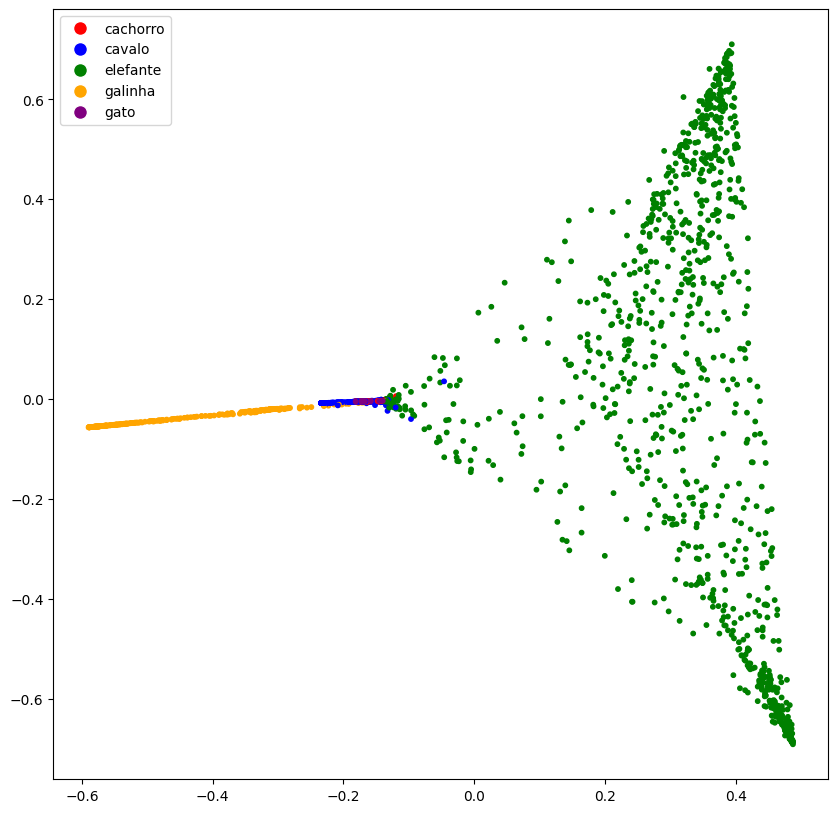

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.scatter(pca_emb[:, 0], pca_emb[:, 1], color =colors,  cmap='viridis', s=10)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'{label}', markerfacecolor=color, markersize=10) for label, color in legenda.items()])